## <span style="color:blue">  Numerical exercises 2</span>

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

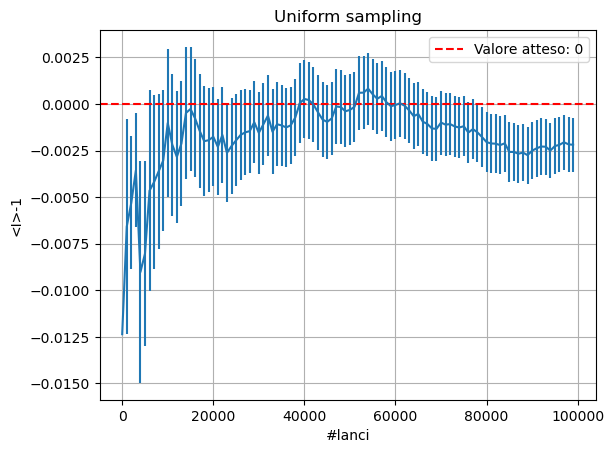

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000              # Total number of throws
N = 100                 # Number of blocks
x = np.arange(N)      # [0,1,2,...,N-1]
L = int(M/N)

# Initialize empty lists to store the two types of data
average = []
error = []

# Open the file in read mode
with open('Output_1', 'r') as file:
    for line in file:
        # Split the line into two parts based on a space (or another delimiter)
        part1, part2 = line.split()  # Assuming each line has two items separated by a space

        # Add the split data to the respective lists, and simultaneously convert strings into floating points
        average.append(float(part1))
        error.append(float(part2))

# Print the two separate lists
# print("Average:", average)
# print("Error:", error)

# Convert the lists to numpy arrays (vectors)
average = np.array(average)
error = np.array(error)

x *= L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x, average - 1, yerr = error)
plt.axhline(0, color='red', linestyle='--', label='Valore atteso: 0') # Horizontal bar at 0
plt.title('Uniform sampling')
plt.legend()
plt.xlabel('#lanci')
plt.ylabel('<I>-1')
plt.grid(True)
plt.show()

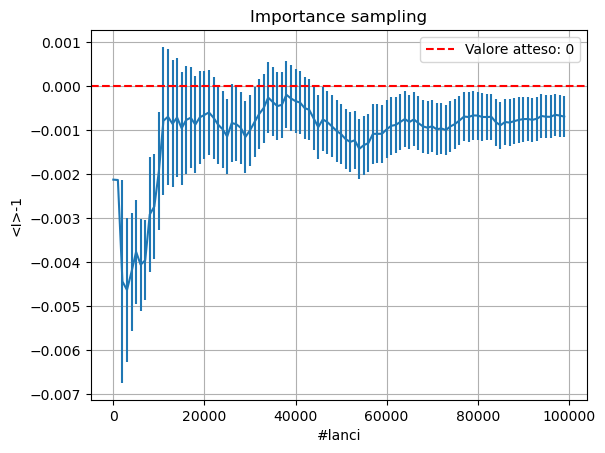

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M = 100000              # Total number of throws
N = 100                 # Number of blocks
x = np.arange(N)      # [0,1,2,...,N-1]
L = int(M/N)

# Initialize empty lists to store the two types of data
average = []
error = []

# Open the file in read mode
with open('Output_2', 'r') as file:
    for line in file:
        # Split the line into two parts based on a space (or another delimiter)
        part1, part2 = line.split()  # Assuming each line has two items separated by a space

        # Add the split data to the respective lists, and simultaneously convert strings into floating points
        average.append(float(part1))
        error.append(float(part2))

# Print the two separate lists
# print("Average:", average)
# print("Error:", error)

# Convert the lists to numpy arrays (vectors)
average = np.array(average)
error = np.array(error)

x *= L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x, average - 1, yerr = error)
plt.axhline(0, color='red', linestyle='--', label='Valore atteso: 0') # Horizontal bar at 0
plt.title('Importance sampling')
plt.legend()
plt.xlabel('#lanci')
plt.ylabel('<I>-1')
plt.grid(True)
plt.show()

### Analisi dei risultati
I grafici illustrano i risultati del calcolo dell'integrale
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Il primo grafico mostra il risultato ottenuto tramite un campionamento da una distribuzione uniforme in [0,1]. Si osserva che la stima dell'integrale converge verso il valore atteso di 1, pur non essendo esattamente compatibile entro un sigma, e l'incertezza statistica diminuisce all'aumentare del numero di lanci, in accordo con la dipendenza attesa.

Il secondo grafico mostra il risultato ottenuto con il metodo dell'importance sampling. Dal confronto con il campionamento uniforme, emerge chiaramente l'efficacia di questa tecnica di riduzione della varianza. Infatti, le barre d'errore sono più piccole a parità di numero di lanci, (circa un ordine di grandezza inferiore).

In conclusione, entrambi i metodi confermano il risultato teorico dell'integrale. Tuttavia, l'importance sampling si dimostra più efficace, fornendo una stima significativamente più precisa.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin
1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

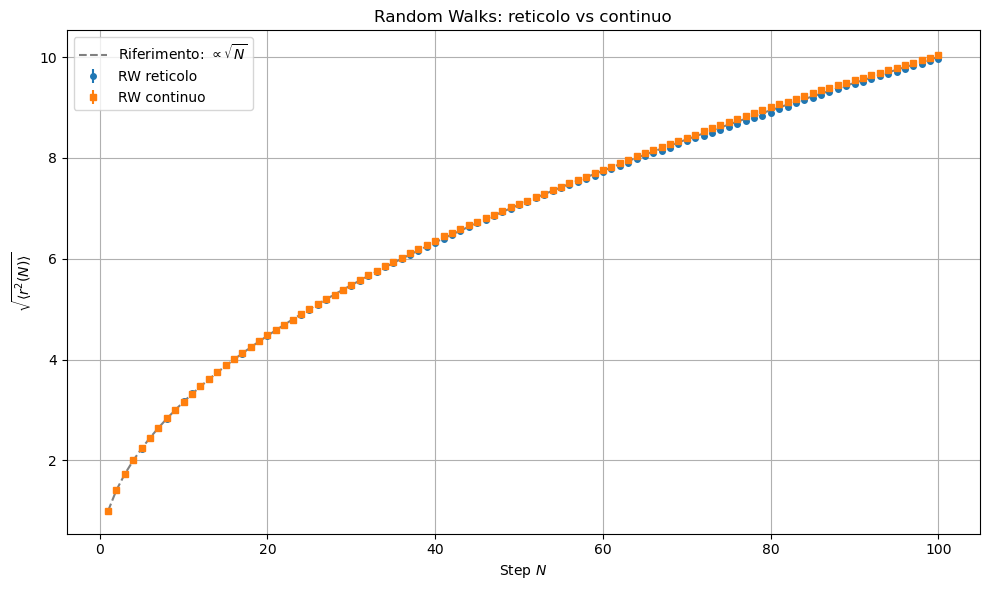

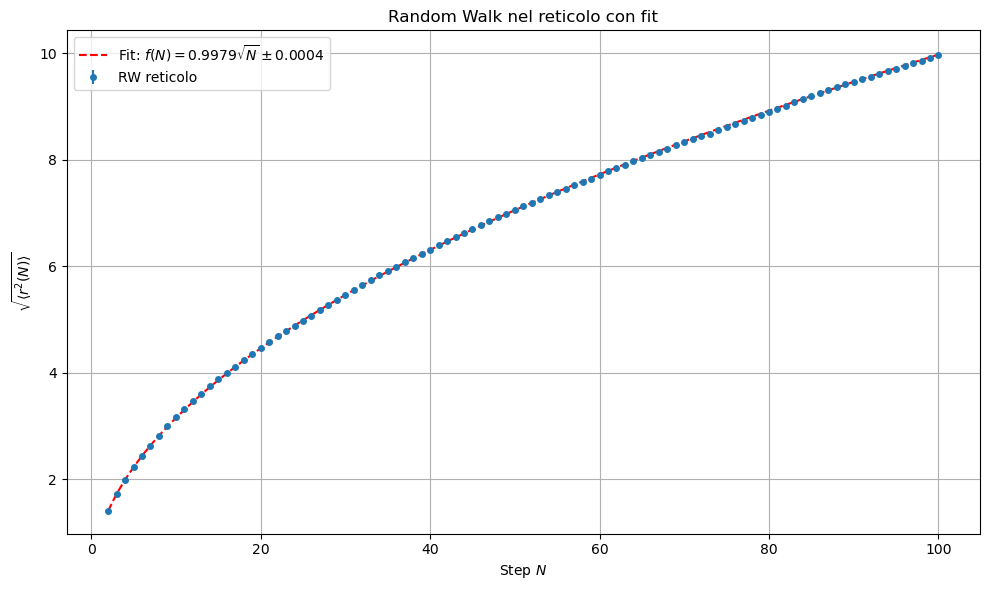

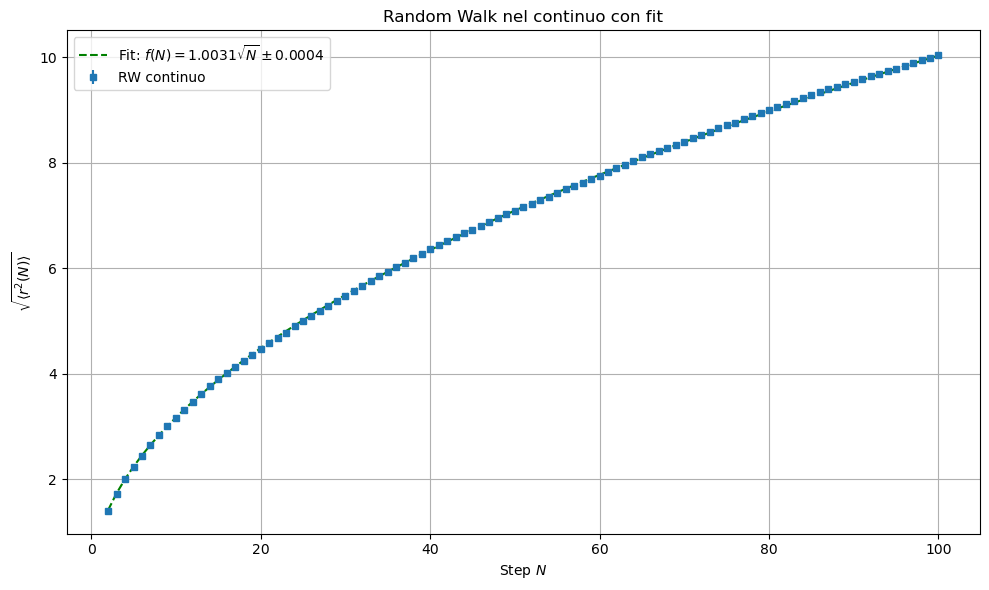

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Funzione modello per il fit
def fit_func(N, k):
    return k * np.sqrt(N)

# Caricamento dati
lattice = np.loadtxt("rw_lattice")
continuum = np.loadtxt("rw_continuum")

steps = lattice[:, 0]
mean_lat = lattice[:, 1]
err_lat = lattice[:, 2]

mean_con = continuum[:, 1]
err_con = continuum[:, 2]

# ==============================
# FILTRAGGIO DATI PER IL FIT
# ==============================

# Lattice: rimuove punti con errore 0 o NaN
mask_lat = (err_lat > 0) & (~np.isnan(err_lat)) & (~np.isnan(mean_lat))
steps_lat = steps[mask_lat]
mean_lat_filtered = mean_lat[mask_lat]
err_lat_filtered = err_lat[mask_lat]

# Continuum: rimuove punti con errore 0 o NaN
mask_con = (err_con > 0) & (~np.isnan(err_con)) & (~np.isnan(mean_con))
steps_con = steps[mask_con]
mean_con_filtered = mean_con[mask_con]
err_con_filtered = err_con[mask_con]

# Fit: RW su reticolo
popt_lat, pcov_lat = curve_fit(fit_func, steps_lat, mean_lat_filtered, sigma=err_lat_filtered, absolute_sigma=True)
k_lat, = popt_lat
err_k_lat = np.sqrt(np.diag(pcov_lat))[0]

# Fit: RW continuo
popt_con, pcov_con = curve_fit(fit_func, steps_con, mean_con_filtered, sigma=err_con_filtered, absolute_sigma=True)
k_con, = popt_con
err_k_con = np.sqrt(np.diag(pcov_con))[0]

# ==============================
# GRAFICO 1: ENTRAMBI I RW
# ==============================
plt.figure(figsize=(10,6))
plt.errorbar(steps, mean_lat, yerr=err_lat, label='RW reticolo', fmt='o', markersize=4)
plt.errorbar(steps, mean_con, yerr=err_con, label='RW continuo', fmt='s', markersize=4)
plt.plot(steps, np.sqrt(steps), '--', label=r'Riferimento: $\propto \sqrt{N}$', color='gray')

plt.xlabel('Step $N$')
plt.ylabel(r'$\sqrt{\langle r^2(N) \rangle}$')
plt.title('Random Walks: reticolo vs continuo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# GRAFICO 2: RW RETICOLO + FIT
# ==============================
plt.figure(figsize=(10,6))
plt.errorbar(steps_lat, mean_lat_filtered, yerr=err_lat_filtered, fmt='o', markersize=4, label='RW reticolo')
plt.plot(steps_lat, fit_func(steps_lat, *popt_lat), 'r--',
         label=fr'Fit: $f(N) = {k_lat:.4f} \sqrt{{N}} \pm {err_k_lat:.4f}$')

plt.xlabel('Step $N$')
plt.ylabel(r'$\sqrt{\langle r^2(N) \rangle}$')
plt.title('Random Walk nel reticolo con fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==============================
# GRAFICO 3: RW CONTINUO + FIT
# ==============================
plt.figure(figsize=(10,6))
plt.errorbar(steps_con, mean_con_filtered, yerr=err_con_filtered, fmt='s', markersize=4, label='RW continuo')
plt.plot(steps_con, fit_func(steps_con, *popt_con), 'g--',
         label=fr'Fit: $f(N) = {k_con:.4f} \sqrt{{N}} \pm {err_k_con:.4f}$')

plt.xlabel('Step $N$')
plt.ylabel(r'$\sqrt{\langle r^2(N) \rangle}$')
plt.title('Random Walk nel continuo con fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Analisi dei risultati

Sono stati simulati 10000 Random Walks tridimensionali, ciascuno della lunghezza di 100 passi, partendo sempre dall'origine, considerando due casi:

- **Random Walk su reticolo cubico:** ad ogni passo, il camminatore si sposta di ±1 lungo uno degli assi cartesiani.
- **Random Walk nel continuo:** ad ogni passo, il camminatore si sposta in una direzione casuale, scelta uniformemente sulla sfera.

Per ogni numero di passi \( N \in [1,100] \), è stata calcolata la quantità  
$$
\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}
$$
cioè la radice del valore quadratico medio della distanza dal punto di partenza, mediata su tutti i Random Walks e con una stima dell'incertezza statistica tramite data blocking.

Come atteso dal comportamento diffusivo del moto browniano, i risultati mostrano chiaramente una crescita compatibile con la legge:

$$
f(N) = k \sqrt{N}
$$

Abbiamo effettuato un fit di questa forma ai dati ottenuti per ciascun tipo di Random Walk. I coefficienti stimati risultano:

- **Reticolo cubico:**

$$
f(N) = (0.9979 \pm 0.0004) \sqrt{N}
$$

- **Continuo:**

$$
f(N) = (1.0031 \pm 0.0004) \sqrt{N}
$$

Entrambi i valori sono compatibili con la teoria e confermano la natura diffusiva dei processi simulati. In particolare, i risultati evidenziano come la distanza media cresca proporzionalmente alla radice del numero di passi, con ottima precisione.

Infine, si osserva che il valore del coefficiente k nel caso continuo è leggermente maggiore di quello del reticolo, come previsto, dato che nel continuo il camminatore può esplorare lo spazio con maggiore libertà direzionale. Tuttavia, la differenza è minima e i due comportamenti risultano entrambi diffusivi.
